In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_excel('D:\dickys task\Happy Work\BootUP\CCPP\Folds5x2_pp.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [2]:
df.shape

(9568, 5)

# Data Science Project

1. Domain Understand, Business Problem Understanding and Exploration
2. Data Collection, Data Exploration and Understanding
    - collect/create doubts
3. Data Cleaning
    - handle missing values
    - handle duplicate entries
    - handle un natural values
    - handle outliers
    - handle unwanted columns
4. Feature Engineering
    - Feature Extraction
    - Feature Selection
        - Exploratory ANalytics using Data Visualization
        - Exploratory Analytics using statistics
    - select best set of features to be fed to ML algorithm
5. Preprocessing
    - encode and scale data
    - split data for train and test
6. Apply Machine Learning Algorithm
7. Peroformance Analysis
8. Optimization & Tuning
    - improve performance of algorithm
9. export the model as pickle file and deploy it to production
10. Monitoring of performance in production

# 2. Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [5]:
df.skew()

AT   -0.136393
V     0.198521
AP    0.265445
RH   -0.431839
PE    0.306509
dtype: float64

# 3. Data Cleaning

In [6]:
#Check for missing values

df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [7]:
#check for duplicated value
df.duplicated().sum()

41

In [8]:
df.drop_duplicates(inplace=True) #to drop duplicated value if any

# 4. Feature Engineering

- Feature Extraction
- Feature Selection

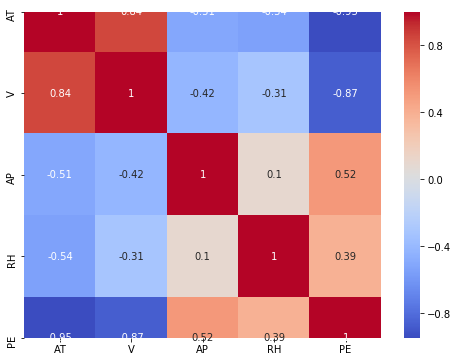

In [9]:
#correlation analysis

cor=df.corr()
plt.figure(figsize=(8,6))

sns.heatmap(cor,annot=True,cmap="coolwarm")

#all features have good and very good relationship so all is important

In [10]:
#separate data

x=df[['RH','AP','V','AT']]
y=df['PE']

# 5. PREPROCESSING

In [11]:
x.head()

,RH,AP,V,AT
0,73.17,1024.07,41.76,14.96
1,59.08,1020.04,62.96,25.18
2,92.14,1012.16,39.40,5.11
3,76.64,1010.24,57.32,20.86
4,96.62,1009.23,37.50,10.82


In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2) #20% of data will be tested as test
print(x.shape)
print(xtrain.shape)
print(xtest.shape)
print(y.shape)
print(ytrain.shape)
print(ytest.shape)

(9527, 4)
(7621, 4)
(1906, 4)
(9527,)
(7621,)
(1906,)


# 6. Applying Machine Learning Algorithm

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [14]:
# train the model using train data
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 7. Performance Analysis

In [15]:
new_data = [[13.97,39.16,1016.05,84.6]]
model.predict(new_data)

array([51.61959607])

In [16]:
#get the prediction for test data
ypred = model.predict(xtest)
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.9250655955231691

# 8. Optimization model

 - repeat from 6th step until we get the wanted result

# 9. Export this model for production

In [17]:
from sklearn.externals import joblib
joblib.dump(model, r"D:\dickys task\Happy Work\BootUP\CCPP\ccpp.pkl")

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['D:\\dickys task\\Happy Work\\BootUP\\CCPP\\ccpp.pkl']